# Trafic sign recognition using CNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Create list for data
data = []
#Create list for labels
labels = []
#Number of classes
classes = 43
current_path = os.getcwd()

In [3]:
#Load traning images and save to data and labels
for i in range(classes):
    path = os.path.join(current_path ,'Data/train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path+'/'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Image loading problem')

In [4]:
data = np.array(data)
labels = np.array(labels)

In [5]:
print(f'Data size: {data.shape}, labels size: {labels.shape}')

Data size: (39209, 30, 30, 3), labels size: (39209,)


In [6]:
#Spliting data to training and testing dataset
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=49)
print(f'X_train size: {X_train.shape}, y_train size: {y_train.shape}, X_val size: {X_val.shape}, y_val size: {y_val.shape}')

X_train size: (31367, 30, 30, 3), y_train size: (31367,), X_val size: (7842, 30, 30, 3), y_val size: (7842,)


In [7]:
#Converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train,43)
y_val = tf.keras.utils.to_categorical(y_val,43)

In [8]:
#Building model 
model = tf.keras.Sequential()
model.add(Conv2D(
    filters = 32, 
    kernel_size = (5,5), 
    activation ='relu',
    input_shape = X_train.shape[1:]
))
model.add(Conv2D(
    filters = 32, 
    kernel_size = (5,5), 
    activation ='relu'
))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu'
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu'
))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

In [9]:
#Configuring the model for training.
model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']  
)

In [10]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [11]:
#Traning model 
history = model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 20,
    validation_data = (X_val,y_val)
)

Epoch 1/20
491/491 [==============================] - 41s 81ms/step - loss: 2.0563 - accuracy: 0.4893 - val_loss: 0.5329 - val_accuracy: 0.8732
Epoch 2/20
491/491 [==============================] - 39s 80ms/step - loss: 0.6947 - accuracy: 0.7907 - val_loss: 0.2433 - val_accuracy: 0.9441
Epoch 3/20
491/491 [==============================] - 39s 80ms/step - loss: 0.4618 - accuracy: 0.8657 - val_loss: 0.1416 - val_accuracy: 0.9631
Epoch 4/20
491/491 [==============================] - 39s 80ms/step - loss: 0.3593 - accuracy: 0.8931 - val_loss: 0.1223 - val_accuracy: 0.9705
Epoch 5/20
491/491 [==============================] - 39s 80ms/step - loss: 0.3033 - accuracy: 0.9112 - val_loss: 0.1049 - val_accuracy: 0.9686
Epoch 6/20
491/491 [==============================] - 39s 80ms/step - loss: 0.2411 - accuracy: 0.9304 - val_loss: 0.0679 - val_accuracy: 0.9819
Epoch 7/20
491/491 [==============================] - 40s 81ms/step - loss: 0.2373 - accuracy: 0.9323 - val_loss: 0.0531 - val_accuracy:

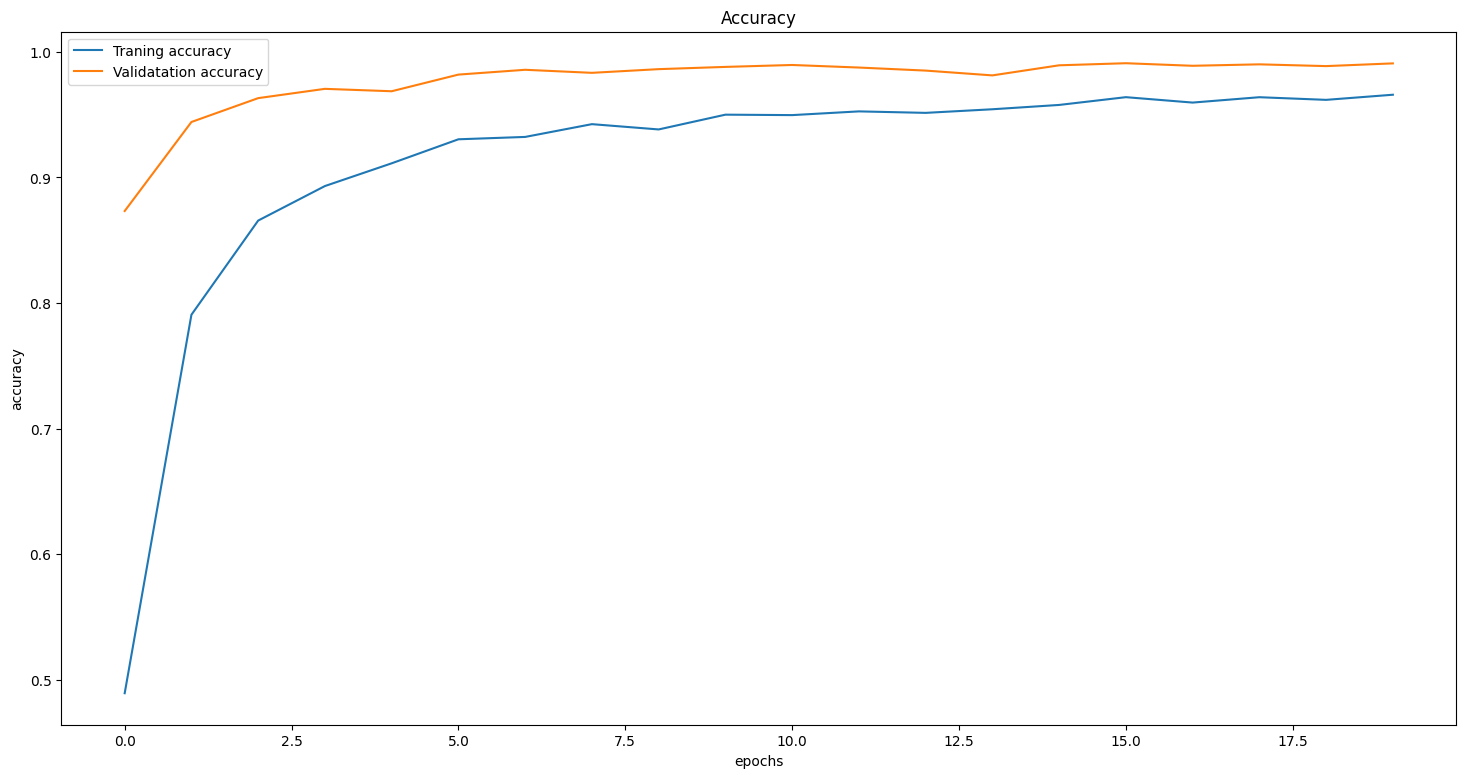

In [12]:
#Ploting graph for accuracy 
plt.figure(0,figsize=(18,9))
plt.plot(history.history['accuracy'], label='Traning accuracy')
plt.plot(history.history['val_accuracy'], label='Validatation accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

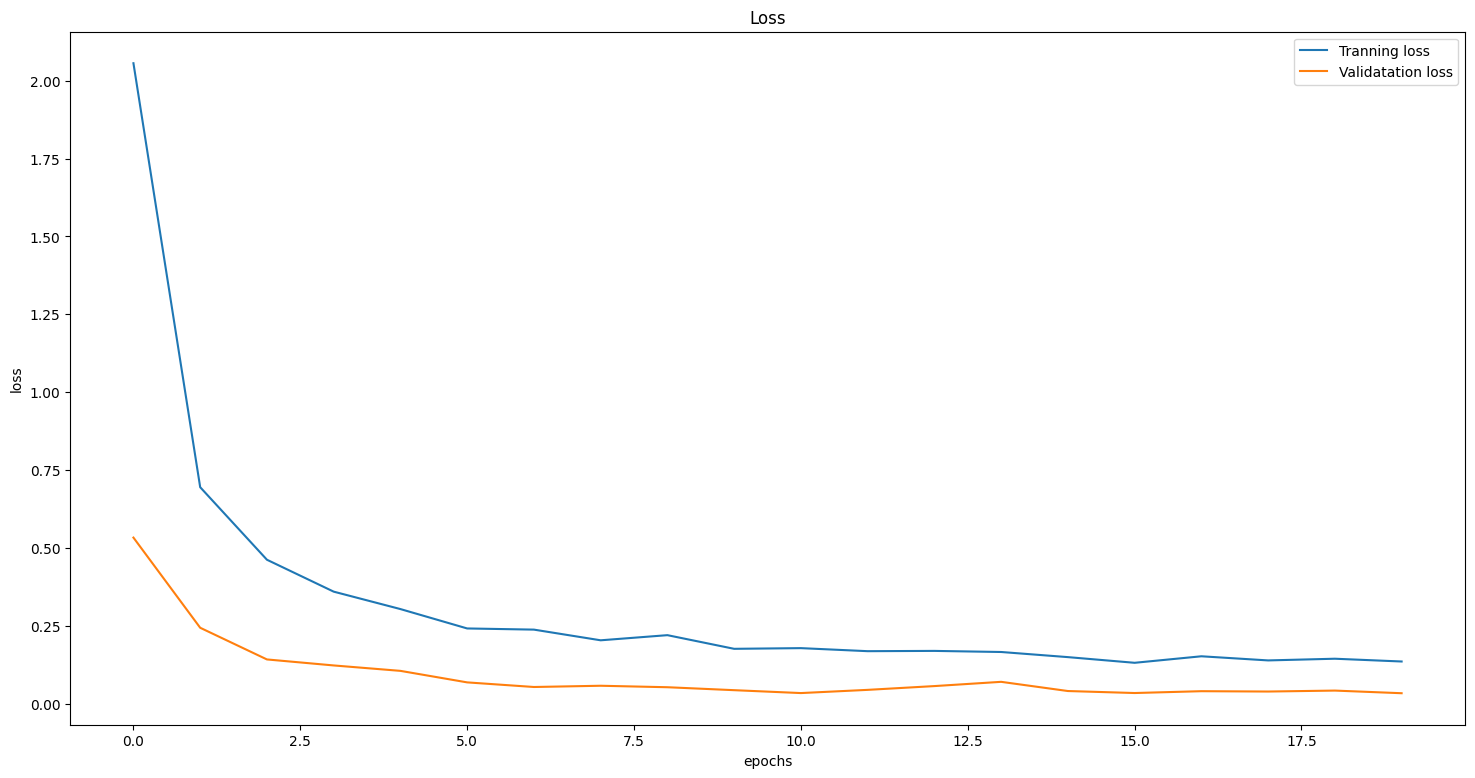

In [13]:
#Ploting graph for loss function 
plt.figure(1,figsize=(18,9))
plt.plot(history.history['loss'], label='Tranning loss')
plt.plot(history.history['val_loss'], label='Validatation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
#Testing model on test dataset
y_test = pd.read_csv('./Data/Test.csv')
test_labels = y_test['ClassId'].values
imgs = y_test['Path'].values
data_test = []

In [15]:
#Load test images 
for img in imgs:
    image = Image.open('Data/'+img)
    image = image.resize((30,30))
    data_test.append(np.array(image))

In [16]:
X_test = np.array(data_test)

In [17]:
#Predict on test dataset
pred = model.predict(X_test)
y_pred = np.argmax(pred,axis=1).tolist()
y_pred = np.array([y_pred]).tolist()[0]

395/395 [==============================] - 3s 8ms/step


In [18]:
print(f'The accuracy of this model is: {np.round(accuracy_score(test_labels,y_pred)*100,2)} %')

The accuracy of this model is: 95.82 %
